In [3]:
import pandas as pd

data_path = "C:/Users/espin/OneDrive/Desktop/Resume/1553768847-housing.csv"
data = pd.read_csv(data_path)

print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


In [5]:
#Change missing values with the mean
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.mean()))


In [6]:
#Convert categorical variables to numbers
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)


In [7]:
from sklearn.model_selection import train_test_split

#variable and features
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

#80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.preprocessing import StandardScaler

#scale
scaler = StandardScaler()

#Fit and transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

#linear regression model
model = LinearRegression()

#Train the model on the training data
model.fit(X_train_scaled, y_train)

#Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

#RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 70031.41991955663


Root Mean Squared Error (RMSE) for median_income: 84209.01241414454


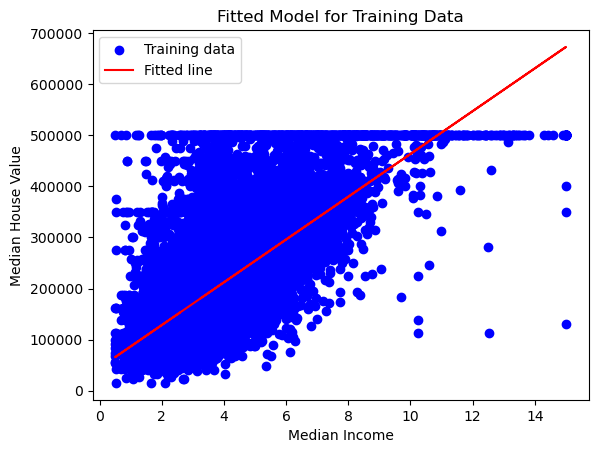

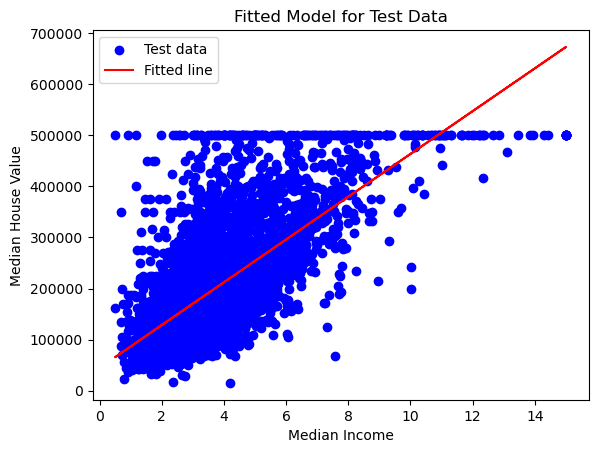

In [10]:
import matplotlib.pyplot as plt

#median_income column
X_train_median_income = X_train[['median_income']]
X_test_median_income = X_test[['median_income']]

#Standardize the median_income
X_train_median_income_scaled = scaler.fit_transform(X_train_median_income)
X_test_median_income_scaled = scaler.transform(X_test_median_income)

#train the linear regression model
model_single = LinearRegression()
model_single.fit(X_train_median_income_scaled, y_train)

#predictions 
y_pred_single = model_single.predict(X_test_median_income_scaled)

#RMSE
rmse_single = np.sqrt(mean_squared_error(y_test, y_pred_single))
print(f"Root Mean Squared Error (RMSE) for median_income: {rmse_single}")

plt.scatter(X_train_median_income, y_train, color='blue', label='Training data')
plt.plot(X_train_median_income, model_single.predict(X_train_median_income_scaled), color='red', label='Fitted line')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Fitted Model for Training Data')
plt.legend()
plt.show()

plt.scatter(X_test_median_income, y_test, color='blue', label='Test data')
plt.plot(X_test_median_income, y_pred_single, color='red', label='Fitted line')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Fitted Model for Test Data')
plt.legend()
plt.show()


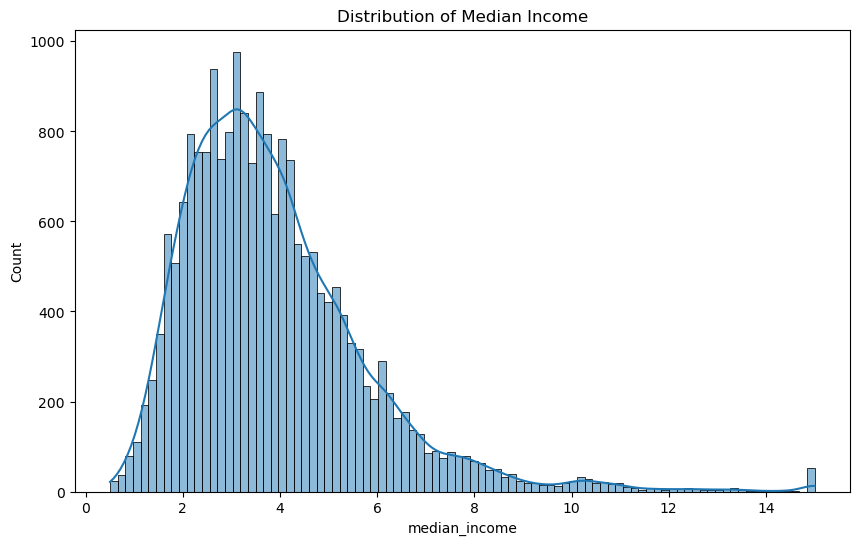

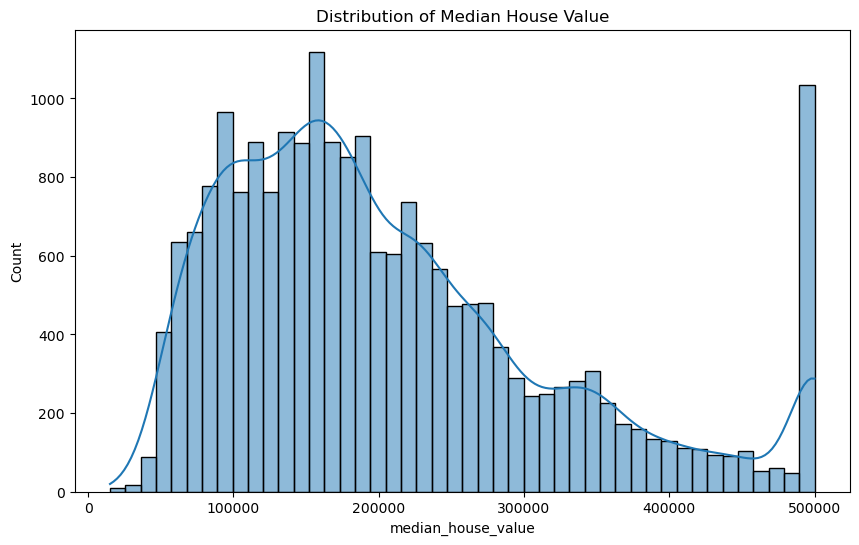

In [11]:
import seaborn as sns

#distribution of median_income
plt.figure(figsize=(10, 6))
sns.histplot(data['median_income'], kde=True)
plt.title('Distribution of Median Income')
plt.show()

#distribution of median_house_value
plt.figure(figsize=(10, 6))
sns.histplot(data['median_house_value'], kde=True)
plt.title('Distribution of Median House Value')
plt.show()


In [12]:
#log transformation
data['median_income_log'] = np.log(data['median_income'] + 1)
data['median_house_value_log'] = np.log(data['median_house_value'] + 1)

#use log-transformed features
X_train_median_income_log = np.log(X_train[['median_income']] + 1)
X_test_median_income_log = np.log(X_test[['median_income']] + 1)


In [13]:
#Z-scores ... identify outliers
from scipy.stats import zscore

z_scores = np.abs(zscore(data[['median_income', 'median_house_value']]))
outliers = np.where(z_scores > 3, True, False)

#remove outliers
data_cleaned = data[~outliers.any(axis=1)]


In [14]:
#define variable and features
X = data_cleaned.drop('median_house_value', axis=1)
y = data_cleaned['median_house_value']

#training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#start and train the linear regression model
model_multi = LinearRegression()
model_multi.fit(X_train_scaled, y_train)

#predictions
y_pred_multi = model_multi.predict(X_test_scaled)

#RMSE
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))
print(f"Root Mean Squared Error (RMSE) with multiple features: {rmse_multi}")


Root Mean Squared Error (RMSE) with multiple features: 29246.566452299336


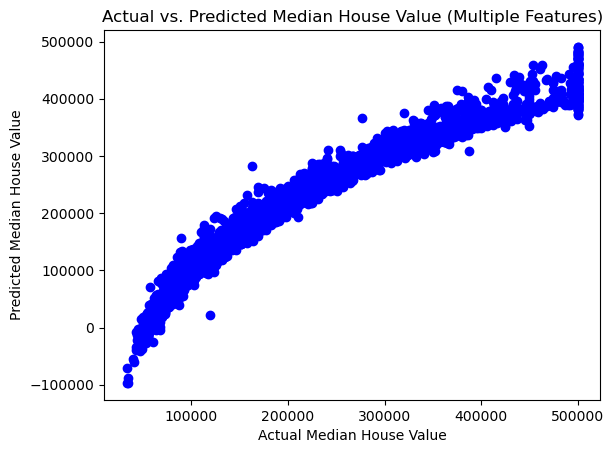

In [15]:
#Plot model
plt.scatter(y_test, y_pred_multi, color='blue')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs. Predicted Median House Value (Multiple Features)')
plt.show()


In [16]:
mean_house_value = y_train.mean()
baseline_predictions = [mean_house_value] * len(y_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))
print(f"Baseline RMSE: {baseline_rmse}")


Baseline RMSE: 111520.52421604916


In [17]:
average_house_value = y_test.mean()
error_percentage = (rmse_multi / average_house_value) * 100
print(f"Error Percentage: {error_percentage:.2f}%")


Error Percentage: 14.32%
